In [1]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

#library for data processing 
import numpy as np
import pandas as pd

#library for plotting
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

#setting pandas and style of visualization
pd.set_option('display.max_columns', 300)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1. EDA dan Data Preprosesing (General)

### - Baris Duplikat

In [4]:
df.duplicated().sum()

0

### - Informasi Data

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### - Missing Value

In [6]:
df_mis_value = pd.DataFrame({ 'Persentase Missing Value':df.isnull().sum()/len(df)*100})

In [7]:
df_mis_value_sort = df_mis_value.sort_values( 'Persentase Missing Value',ascending=False)
df_mis_value_sort.head()

,Persentase Missing Value
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963


<AxesSubplot:>

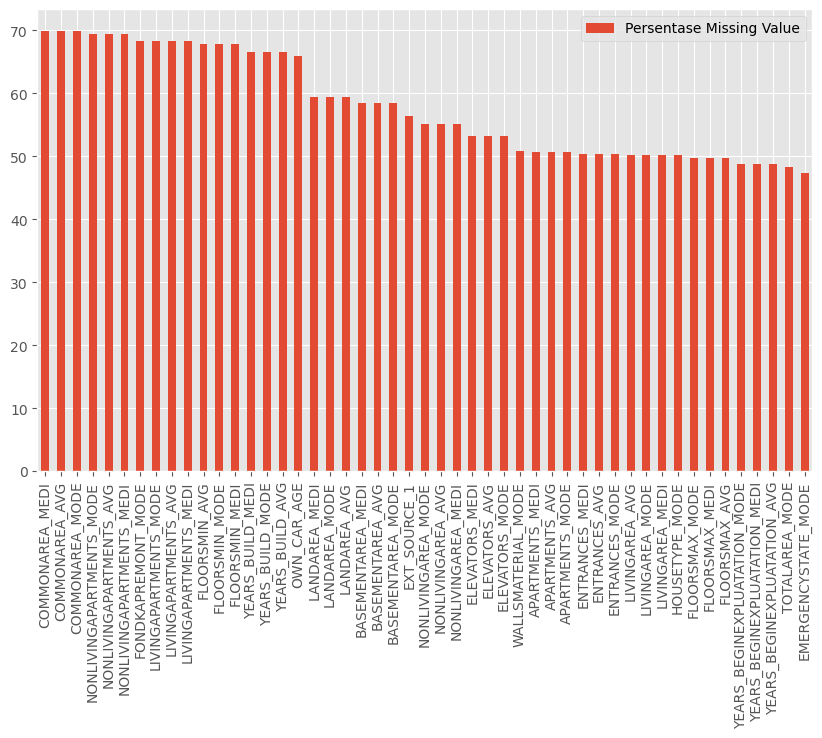

In [8]:
df_mis_value_sort[df_mis_value_sort['Persentase Missing Value']>45].plot(kind='bar',figsize=(10,6))

##### Drop Kolom dengan missing value > 45%

In [9]:
drop_null = list(df_mis_value_sort[df_mis_value_sort['Persentase Missing Value']>45].index)
df.drop(drop_null,1,inplace=True)

In [10]:
df.shape

(307511, 73)

In [11]:
df.isnull().sum().index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [12]:
df_mis = df[list(df.isnull().sum().index)]
df_mis['TARGET'] = df.TARGET

<AxesSubplot:title={'center':'Korelasi Kolom Independen terhadap Kolom Dependen'}, xlabel='Kolom Dependen', ylabel='Korelasi dengan Kolom Independen'>

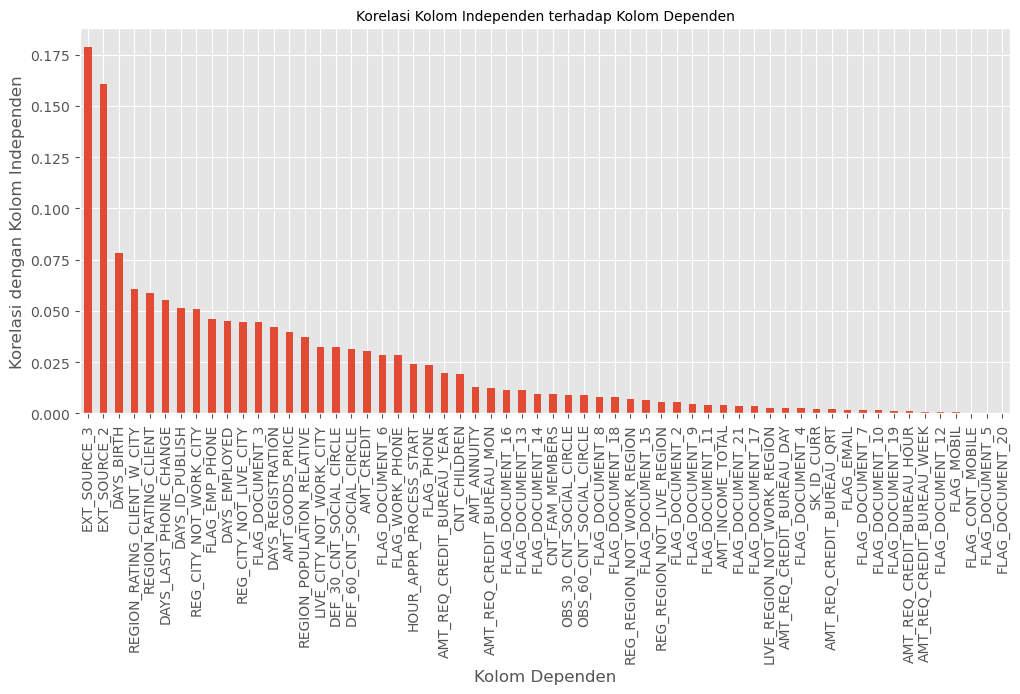

In [13]:
plt.figure(figsize=(12,5))
plt.title('Korelasi Kolom Independen terhadap Kolom Dependen', size = 'medium')
plt.xlabel('Kolom Dependen')
plt.ylabel('Korelasi dengan Kolom Independen')
target_corr = abs(df_mis.corr()['TARGET'])
target_corr = target_corr.drop('TARGET')
target_corr.sort_values(ascending = False).plot(kind='bar')

##### Drop kolom yang masih memiliki missing value yang memiliki korelasi sangat rendah dengan target

In [14]:
FLAG =  [i for i in df if i.startswith('FLAG_DOCUMENT')]
FLAG.extend(['SK_ID_CURR'])

In [15]:
FLAG

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'SK_ID_CURR']

In [16]:
df.drop(FLAG,1,inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
dtype: int64

##### Isi kolom yang masih memiliki missing value < 45%

In [18]:
df.OCCUPATION_TYPE.fillna('Other',inplace = True) #OCCUPATION TYPE
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.mean(),inplace=True) #AMT_GOODS_PRICE
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(),inplace=True) #AMT_GOODS_PRICE
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS
df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

# 2. EDA dan Data Preprosesing (Data Kategorikal) : 

##### - Nilai unik tiap kolom (konsistensi data)

In [19]:
cat = df.select_dtypes(include='object').columns
for i in cat:
    print(str(i))
    print(df[i].unique())
    print('\n')

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']


CODE_GENDER
['M' 'F' 'XNA']


FLAG_OWN_CAR
['N' 'Y']


FLAG_OWN_REALTY
['Y' 'N']


NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']


NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']


NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' 'Other' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' '

##### - Detail Data Target

###### Gender

In [20]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Ubah XNA ke salah satu gender karena jumlahnya terlalu sedikit.

In [21]:
df.loc[df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [22]:
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

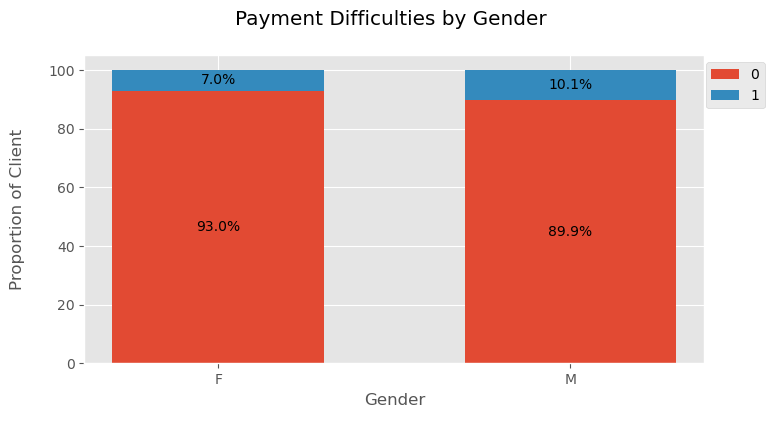

In [23]:
import matplotlib.ticker as mtick
gender_target =df.groupby(['CODE_GENDER','TARGET']).size().unstack()
ax = (gender_target.T*100.0 / gender_target.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (8,4))
plt.ylabel('Proportion of Client\n')
plt.xlabel('Gender\n')
plt.title('Payment Difficulties by Gender \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=False)
plt.savefig('payment difficulties by gender')

###### Name Contract Type

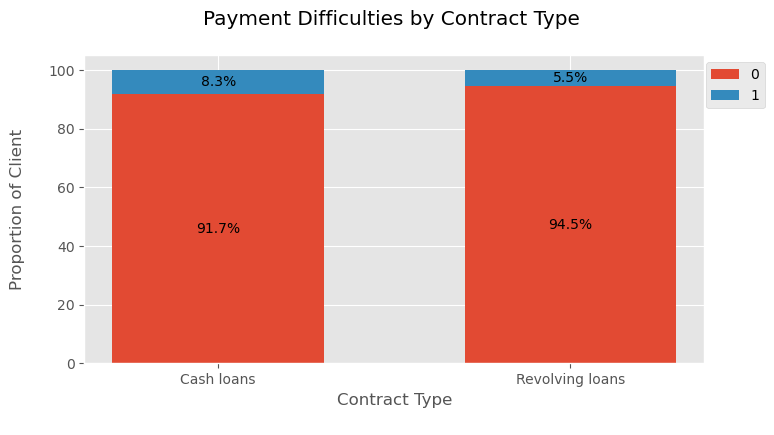

In [24]:
import matplotlib.ticker as mtick
contract_target =df.groupby(['NAME_CONTRACT_TYPE','TARGET']).size().unstack()
ax = (contract_target.T*100.0 / contract_target.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (8,4))
plt.ylabel('Proportion of Client\n')
plt.xlabel('Contract Type\n')
plt.title('Payment Difficulties by Contract Type \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=False)
plt.savefig('payment difficulties by contract')

###### Name Income Type

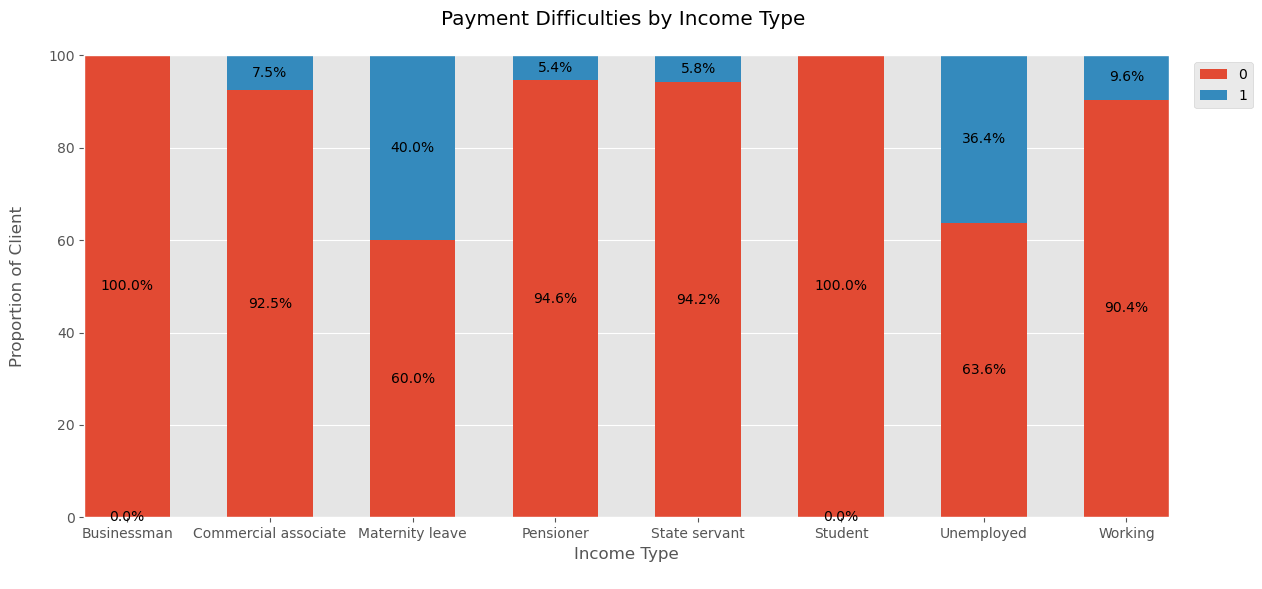

In [25]:
import matplotlib.ticker as mtick
income_target =df.groupby(['NAME_INCOME_TYPE','TARGET']).size().unstack()
ax = (income_target.T*100.0 / income_target.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (14,6))
plt.ylabel('Proportion of Client\n')
plt.xlabel('Income Type\n')
plt.title('Payment Difficulties by Income Type \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=True)
plt.savefig('payment difficulties by income')

###### Name Education Type

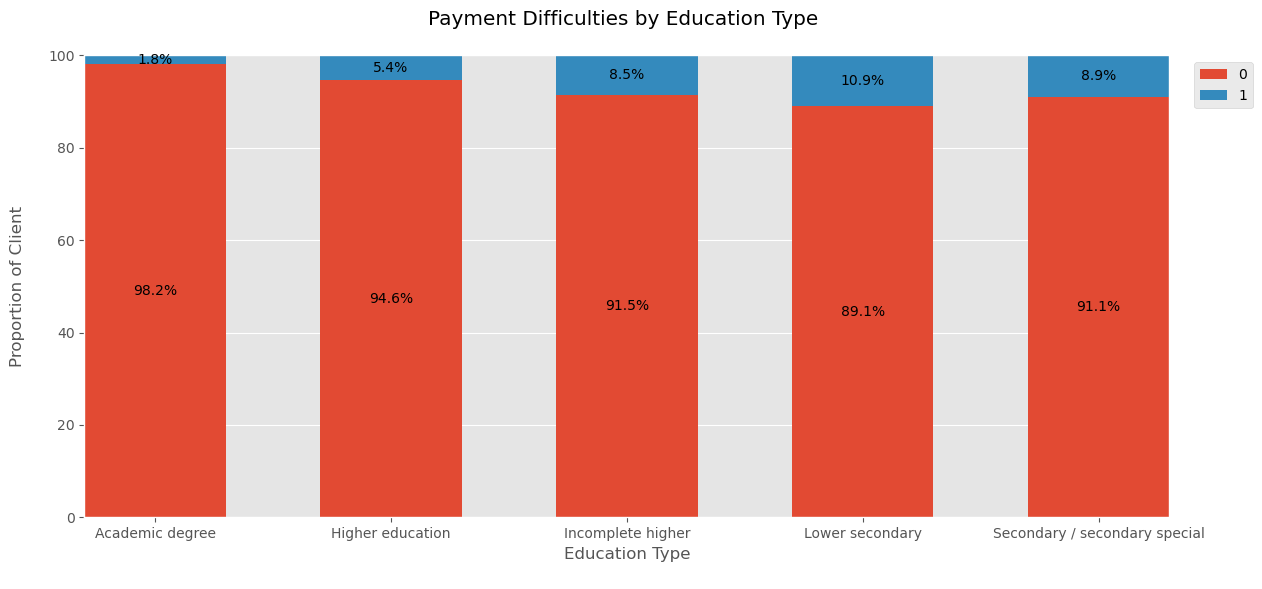

In [26]:
import matplotlib.ticker as mtick
edu_target =df.groupby(['NAME_EDUCATION_TYPE','TARGET']).size().unstack()
ax = (edu_target.T*100.0 / edu_target.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (14,6))
plt.ylabel('Proportion of Client\n')
plt.xlabel('Education Type\n')
plt.title('Payment Difficulties by Education Type \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=True)
plt.savefig('payment difficulties by EDU')

###### WEEKDAY APPROACH PROCESS START

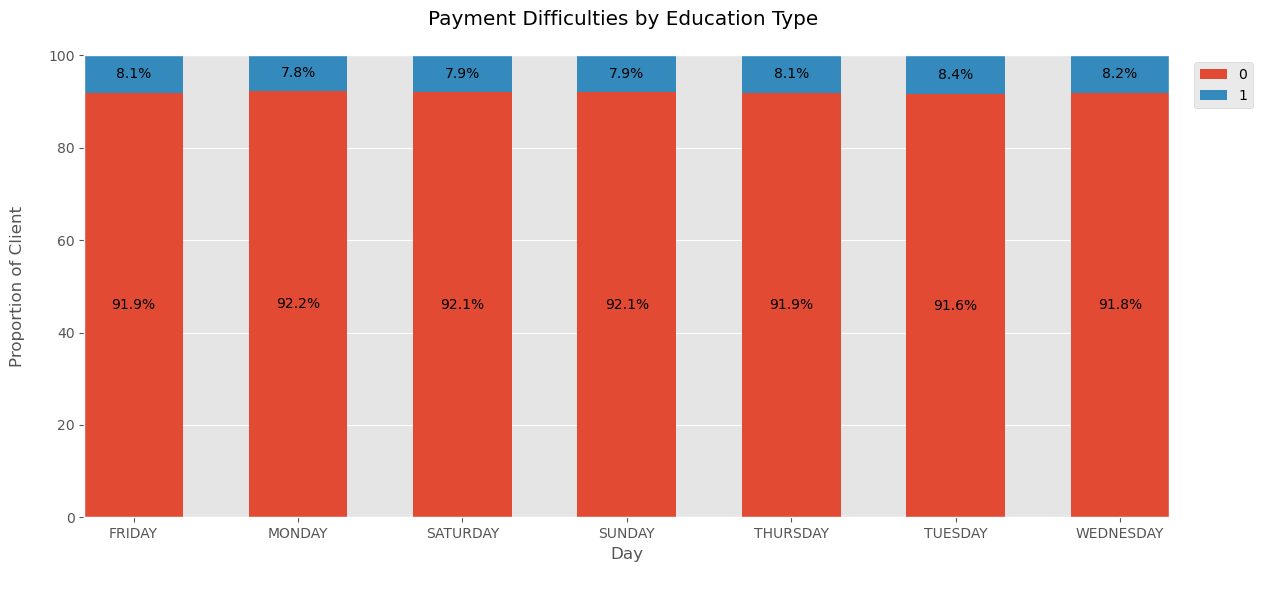

In [27]:
import matplotlib.ticker as mtick
day_target =df.groupby(['WEEKDAY_APPR_PROCESS_START','TARGET']).size().unstack()
ax = (day_target.T*100.0 / day_target.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (14,6))
plt.ylabel('Proportion of Client\n')
plt.xlabel('Day\n')
plt.title('Payment Difficulties by Education Type \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=True)
plt.savefig('payment difficulties by day')

# 3. EDA dan Data Preprosesing (Data Numerik) :

##### - Statistik Deskriptif

In [28]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,-962.855657,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692794e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.808966,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000

Terdapat nilai negatif pada kolom DAY, hal tersebut tentu tidak relevan sehingga harus diperbaiki

In [29]:
days = [i for i in df if i.startswith('DAYS')]
df[days]=abs(df[days])
df[days].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


##### - Korelasi antar variabel

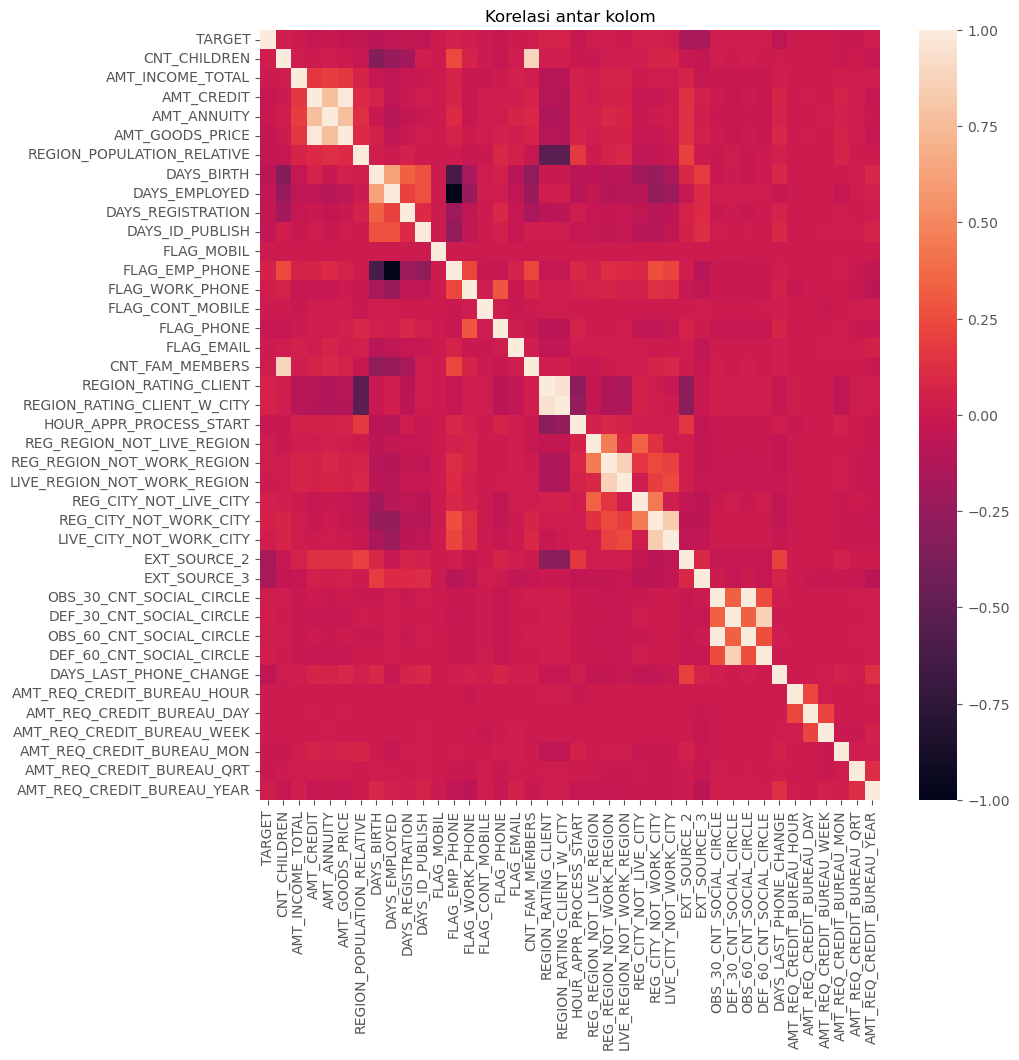

In [30]:
plt.figure(figsize=(10,10))
plt.title('Korelasi antar kolom',size = 'large')
sns.heatmap(round(df.corr(),2))
plt.savefig('heatmap korelasi')

In [31]:
cor = df.drop('TARGET',axis=1)
cor = cor.corr().abs().copy()
cor_unstack = cor.unstack()
list_cor = cor_unstack.sort_values(kind="quicksort",ascending=False)
list_cor[list_cor<1].drop_duplicates().head(15)

FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999753
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998491
AMT_CREDIT                   AMT_GOODS_PRICE                0.986588
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879161
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.860556
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825575
AMT_ANNUITY                  AMT_GOODS_PRICE                0.774661
AMT_CREDIT                   AMT_ANNUITY                    0.770127
DAYS_EMPLOYED                DAYS_BIRTH                     0.623941
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.619888
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.532877
                             REGION_RATING_CLIENT_W_CITY    0.531535
REG_REGION_NOT_WORK_REGION   REG_R

Drop beberapa kolom yang multicollinearity :
1. FLAG_EMP_PHONE
2. OBS_30_CNT_SOCIAL_CIRCLE     
3. AMT_GOODS_PRICE                                   
4. REGION_RATING_CLIENT_W_CITY  
5. CNT_CHILDREN  
6. LIVE_REGION_NOT_WORK_REGION 
7. AMT_ANNUITY  
8. DEF_60_CNT_SOCIAL_CIRCLE     
9. REG_CITY_NOT_WORK_CITY       


In [32]:
mc_drop=['FLAG_EMP_PHONE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE',
         'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','LIVE_REGION_NOT_WORK_REGION','AMT_ANNUITY',
        'DEF_60_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_WORK_CITY']
df.drop(mc_drop,1,inplace=True)

In [33]:
df.shape

(307511, 43)

In [34]:
cor = df.drop('TARGET',axis=1)
cor = cor.corr().abs().copy()
cor_unstack = cor.unstack()
list_cor = cor_unstack.sort_values(kind="quicksort",ascending=False)
list_cor[list_cor<1].drop_duplicates().head(15)

DAYS_EMPLOYED               DAYS_BIRTH                    0.623941
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE    0.532877
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION    0.450804
REG_CITY_NOT_LIVE_CITY      REG_REGION_NOT_LIVE_REGION    0.339232
DEF_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.331951
DAYS_REGISTRATION           DAYS_BIRTH                    0.331912
FLAG_PHONE                  FLAG_WORK_PHONE               0.293105
EXT_SOURCE_2                REGION_RATING_CLIENT          0.292621
HOUR_APPR_PROCESS_START     REGION_RATING_CLIENT          0.285699
DAYS_BIRTH                  CNT_FAM_MEMBERS               0.278894
DAYS_ID_PUBLISH             DAYS_EMPLOYED                 0.274842
                            DAYS_BIRTH                    0.272691
CNT_FAM_MEMBERS             DAYS_EMPLOYED                 0.234365
FLAG_WORK_PHONE             DAYS_EMPLOYED                 0.233640
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY     0.23

##### - Korelasi dgn data target

<AxesSubplot:title={'center':'Korelasi Kolom Independen terhadap Kolom Dependen'}, xlabel='Kolom Dependen', ylabel='Korelasi dengan Kolom Independen'>

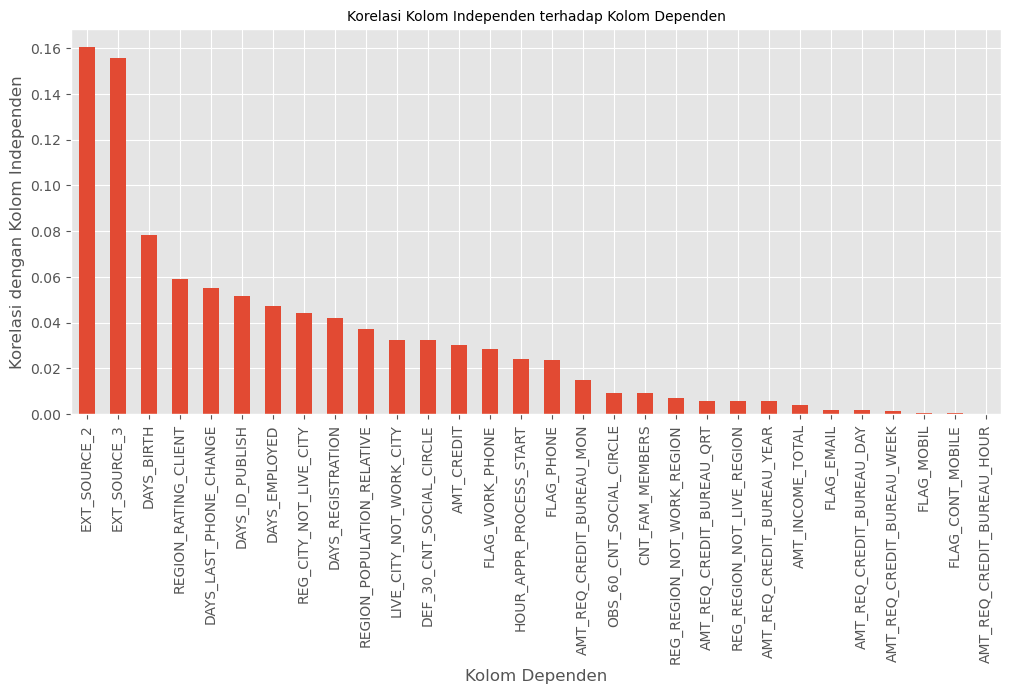

In [35]:
plt.figure(figsize=(12,5))
plt.title('Korelasi Kolom Independen terhadap Kolom Dependen', size = 'medium')
plt.xlabel('Kolom Dependen')
plt.ylabel('Korelasi dengan Kolom Independen')
target_corr = abs(df.corr()['TARGET'])
target_corr = target_corr.drop('TARGET')
target_corr.sort_values(ascending = False).plot(kind='bar')

##### - Distribusi data

In [36]:
df_num = df.drop('TARGET',1)
df_num.select_dtypes(include='number').shape

(307511, 30)

<Figure size 640x480 with 0 Axes>

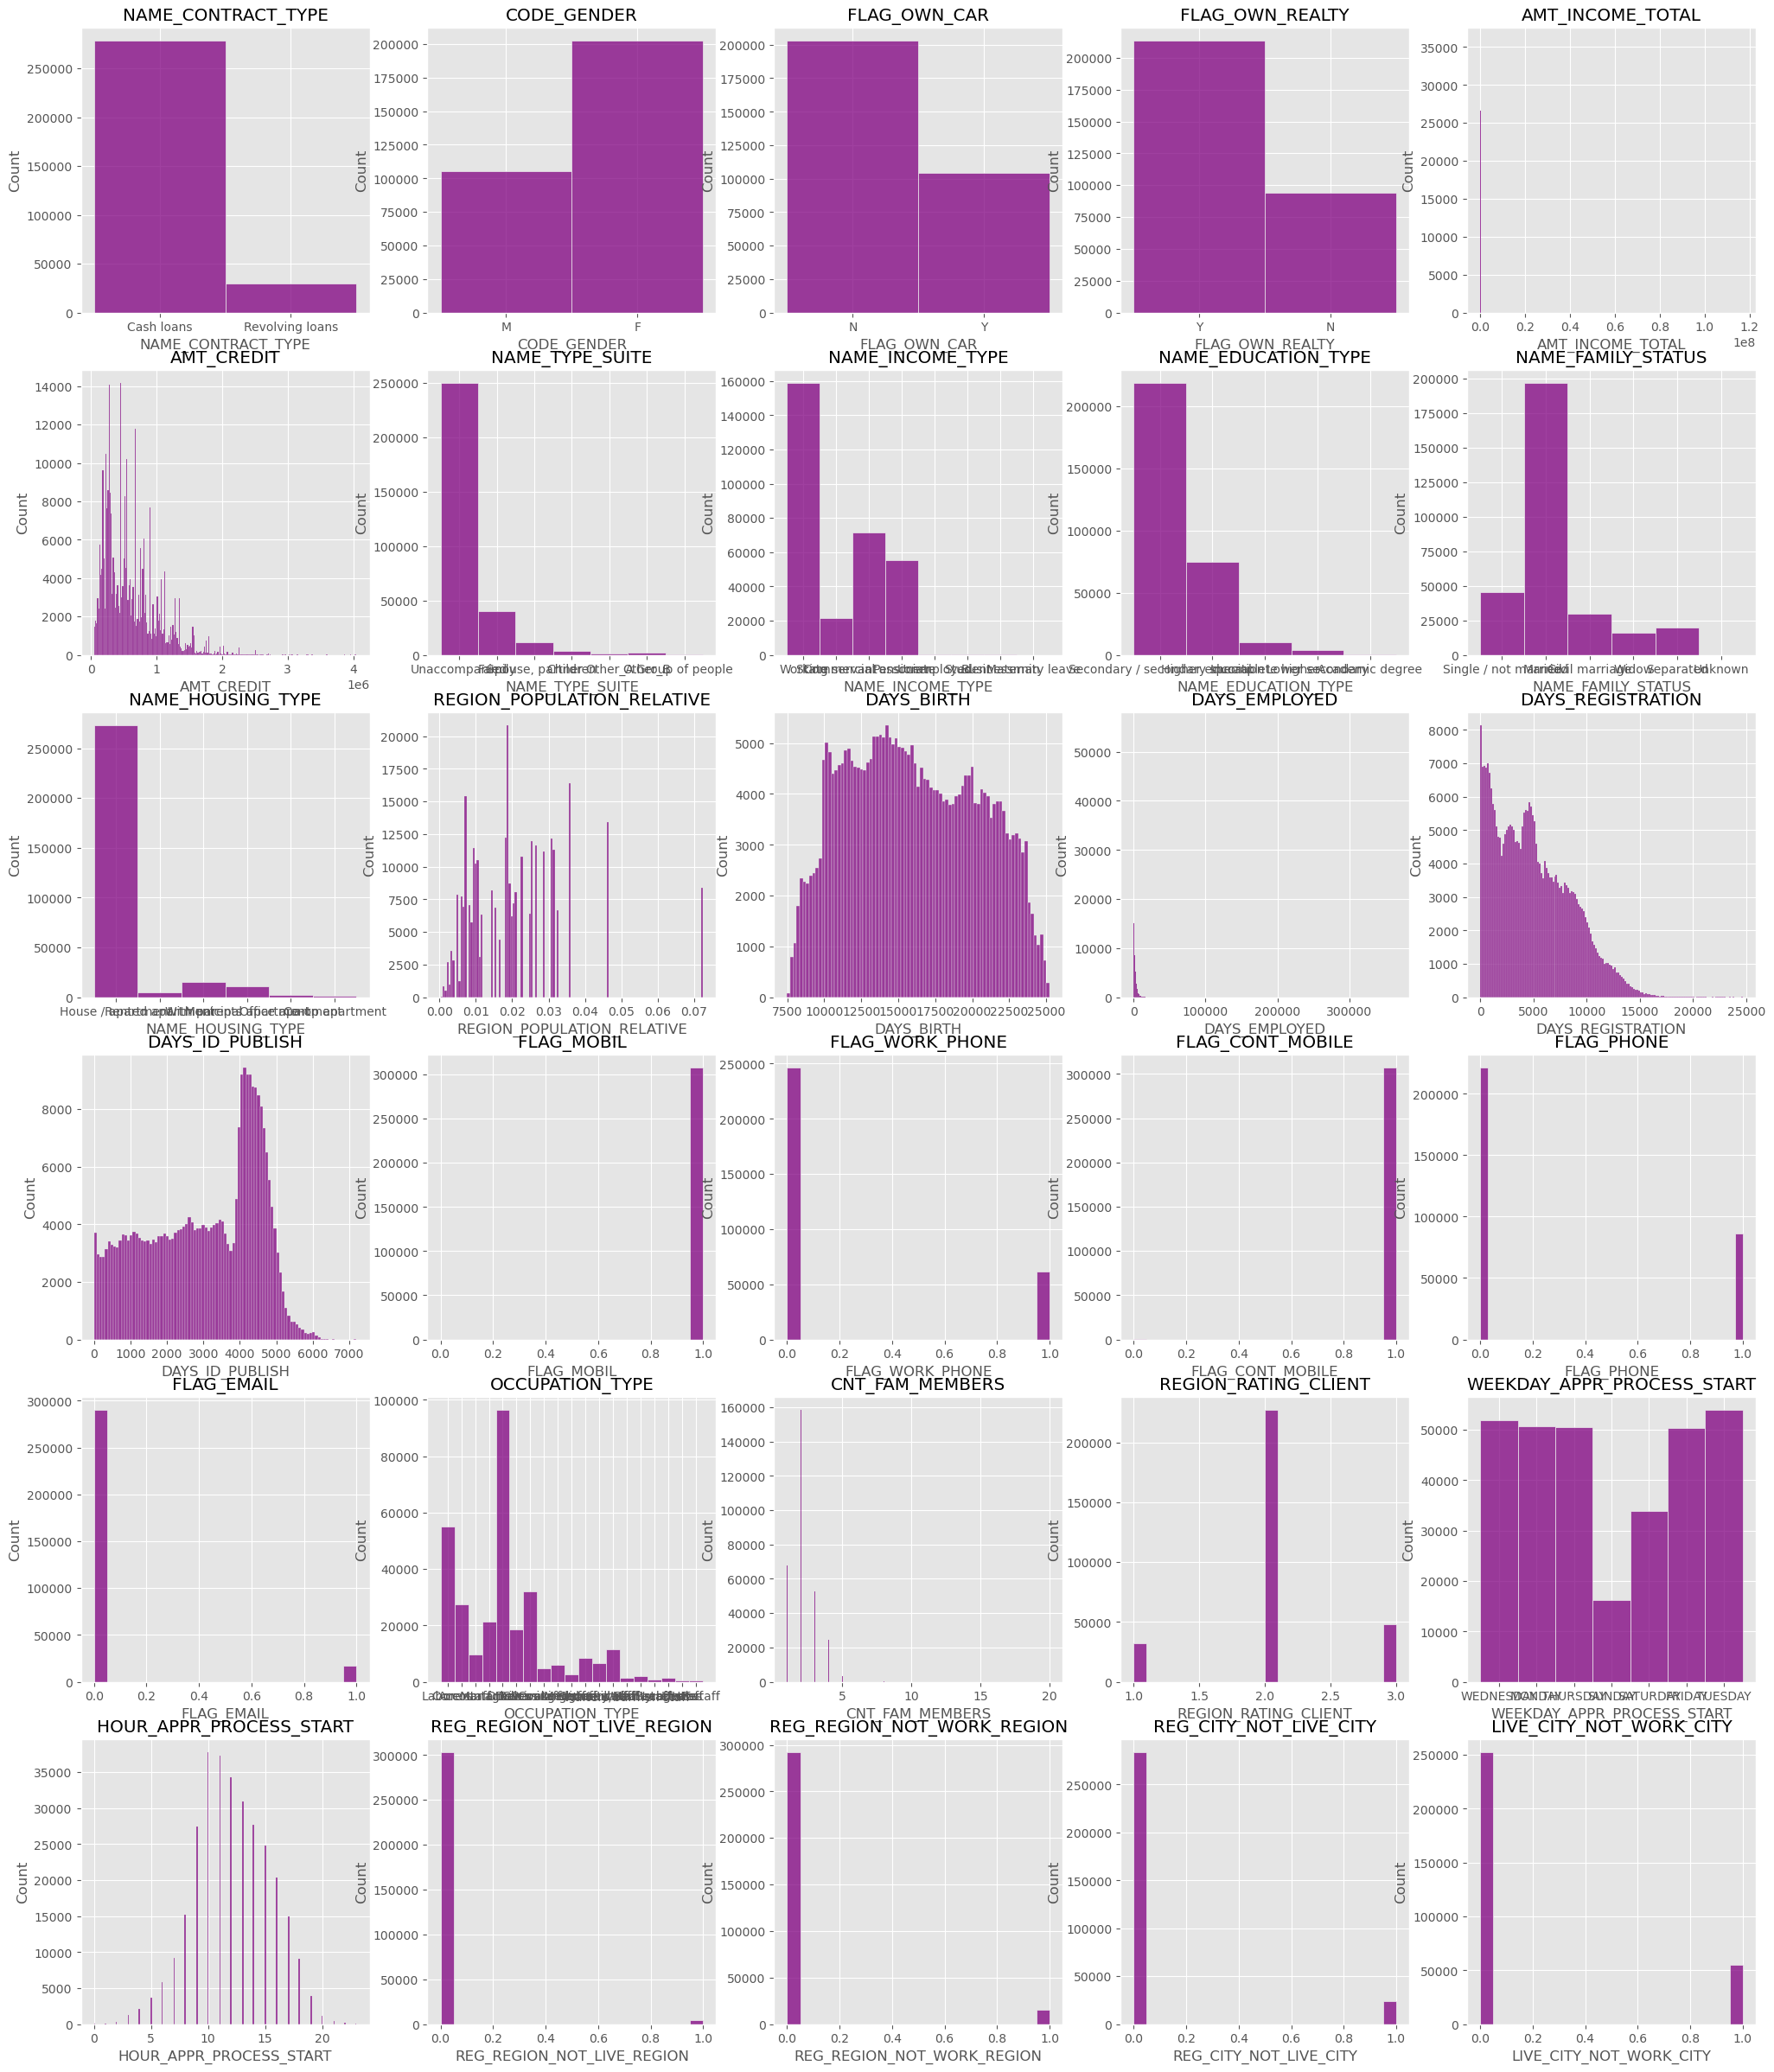

In [37]:
x = 6
y = 5

plt.figure()
fig, ax = plt.subplots(x, y, figsize=(25, 30))
col = 0
column = df_num.columns
for i in range(x):
    for j in range(y):
        sns.histplot(df[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1
fig.savefig('distribusi data.png')

Terapkan standar scaler pada beberapa kolom berikut :
1. AMT_CREDIT
2. DAYS_REGISTRATION
3. DAYS_ID_PUBLISH

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
df['AMT_CREDIT'] = StandardScaler().fit_transform(df['AMT_CREDIT'].values.reshape(len(df), 1))
df['DAYS_REGISTRATION'] = StandardScaler().fit_transform(df['DAYS_REGISTRATION'].values.reshape(len(df), 1))
df['DAYS_ID_PUBLISH'] = StandardScaler().fit_transform(df['DAYS_ID_PUBLISH'].values.reshape(len(df), 1))

##### - Outliers

In [39]:
numerical_col = df.drop('TARGET',1)
numerical_col = numerical_col.select_dtypes(include='number').columns
len(numerical_col)

30

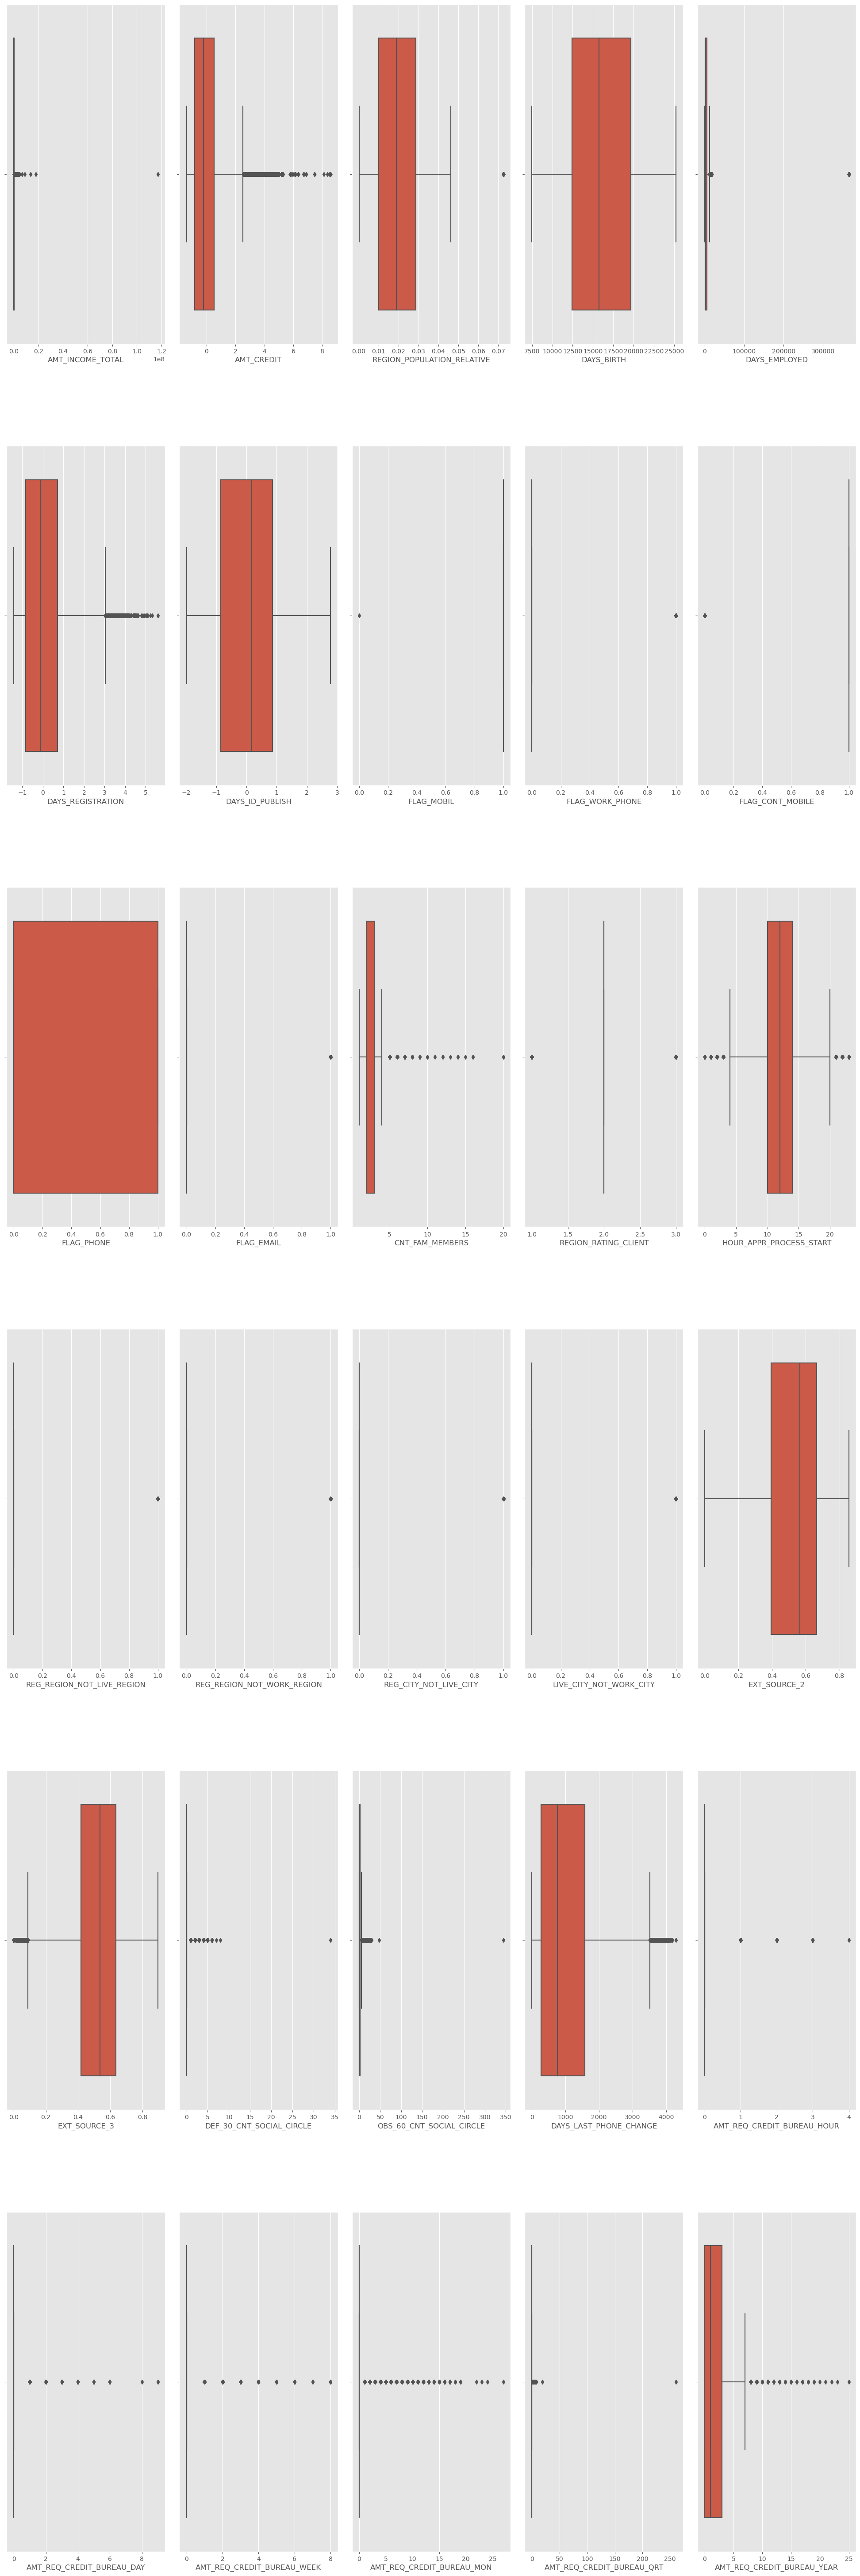

In [40]:
fig , axes = plt.subplots(nrows=6, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(df[column],ax=ax)   #Ploting 

Kolom yang memiliki outliers :
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. DAYS_EMPLOYED
4. CNT_FAM_MEMBERS
5. DEF_30_CNT_SOCIAL_CIRCLE
6. OBS_60_CNT_SOCIAL_CIRCLE
7. AMT_REQ_CREDIT_BUREAU_MON
8. AMT_REQ_CREDIT_BUREAU_QRT
9. AMT_REQ_CREDIT_BUREAU_YEAR

In [41]:
filtered_entries = np.array([True] * len(df))
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT','DAYS_EMPLOYED','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

# 4. EDA data target :

##### - Data balance

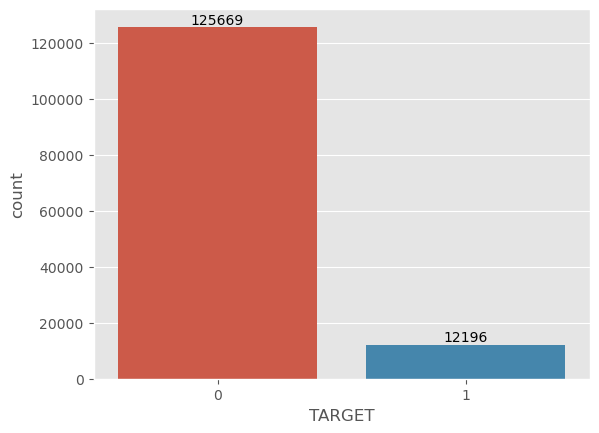

In [42]:
ax = sns.countplot(data=df,x='TARGET')
ax.bar_label(ax.containers[0])
plt.savefig('TARGET comparison')

# 5. Fitur Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
category=list(df.select_dtypes(include='object').columns)
for cat in category:
    label = LabelEncoder() 
    df[cat]= label.fit_transform(df[cat])

In [44]:
df.shape

(137865, 43)

In [45]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,0,0,0,0,0,270000.0,1.725450,1,4,1,1,1,0.003541,16765,1188,-1.078697,-1.790855,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,39,0.622246,0.535276,0.0,1.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,67500.0,-1.152888,6,6,4,3,1,0.010032,19046,225,-0.206116,-0.306869,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,11,0.555912,0.729567,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,135000.0,-0.711430,6,6,4,0,1,0.008019,19005,3039,1.375829,-0.369143,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,5,0.650442,0.535276,0.0,2.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,1,121500.0,-0.213734,6,6,4,3,1,0.028663,19932,3038,-0.191639,0.307263,1,0,1,0,0,3,1.0,2,4,11,0,0,0,1,37,0.322738,0.535276,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1,1,0,1,135000.0,-0.482064,6,6,4,3,1,0.019689,14469,2019,2.682714,0.661035,1,0,1,0,0,8,1.0,2,4,8,0,0,0,0,9,0.746644,0.535276,0.0,2.0,1673.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Model and Evaluation

In [46]:
X = df.drop('TARGET',1)
y = df['TARGET']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#### Logistic Regression

In [51]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)  
y_pred = model.predict(X_test)
print('Akurasi Logistic Regression : ' ,accuracy_score(y_test, y_pred))
print('Recall Logistic Regression : ', recall_score(y_test, y_pred))
print('Precision Logistic Regression : ', precision_score(y_test,y_pred))
print('F1 Score Logistic Regression : ', f1_score(y_test,y_pred))

Akurasi Logistic Regression :  0.5511605415860735
Recall Logistic Regression :  0.5687924016282225
Precision Logistic Regression :  0.10990509150018353
F1 Score Logistic Regression :  0.18421515204781155


##### Random Forest

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = RandomForestClassifier()
model.fit(X_train_oversampled, y_train_oversampled )  
y_pred = model.predict(X_test)
print('Akurasi Random Forest : ' ,accuracy_score(y_test, y_pred))
print('Recall RandomForestClassifier : ', recall_score(y_test, y_pred))
print('Precision RandomForestClassifier : ', precision_score(y_test,y_pred))
print('F1 Score RandomForestClassifier : ', f1_score(y_test,y_pred))

Akurasi Random Forest :  0.8934961315280464
Recall RandomForestClassifier :  0.06350067842605156
Precision RandomForestClassifier :  0.19696969696969696
F1 Score RandomForestClassifier :  0.0960394007798071


#### KNN

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = KNeighborsClassifier()
model.fit(X_train_oversampled, y_train_oversampled )  
y_pred = model.predict(X_test)
print('Akurasi KNN : ' ,accuracy_score(y_test, y_pred))
print('Recall KNN : ', recall_score(y_test, y_pred))
print('Precision KNN : ', precision_score(y_test,y_pred))
print('F1 Score KNN : ', f1_score(y_test,y_pred))

Akurasi KNN :  0.6624032882011606
Recall KNN :  0.341112618724559
Precision KNN :  0.09826454033771106
F1 Score KNN :  0.15257631850458214


# 8. Tuning Hyper parameter

# 9. Prediksi

Akurasi pada saat tidak menggunakan hyperparameter justru lebih tinggi dibandingkan ketika memakai hyperparameter hasil tuning. Oleh karena itu, untuk melakukan prediksi akan digunakan model Random Forest tanpa hyperparameter.

In [54]:
test = pd.read_csv('Application_test.csv')

In [55]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [56]:
drop=['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE',
 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'SK_ID_CURR','FLAG_EMP_PHONE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','LIVE_REGION_NOT_WORK_REGION','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_WORK_CITY']

In [57]:
test.drop(drop,1,inplace=True)

In [58]:
test.loc[test.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [59]:
days = [i for i in test if i.startswith('DAYS')]
test[days]=abs(test[days])
test[days].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,19241,2329,5170.0,812,1740.0
1,18064,4469,9118.0,1623,0.0
2,20038,4458,2175.0,3503,856.0
3,13976,1866,2000.0,4208,1805.0
4,13040,2191,4000.0,4262,821.0


In [60]:
test.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE               15605
EXT_SOURCE_3                   8668
AMT_REQ_CREDIT_BUREAU_QRT      6049
AMT_REQ_CREDIT_BUREAU_MON      6049
AMT_REQ_CREDIT_BUREAU_WEEK     6049
AMT_REQ_CREDIT_BUREAU_DAY      6049
AMT_REQ_CREDIT_BUREAU_HOUR     6049
AMT_REQ_CREDIT_BUREAU_YEAR     6049
NAME_TYPE_SUITE                 911
OBS_60_CNT_SOCIAL_CIRCLE         29
DEF_30_CNT_SOCIAL_CIRCLE         29
EXT_SOURCE_2                      8
REG_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_LAST_PHONE_CHANGE            0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
FLAG_OWN_REALTY                   0
FLAG_OWN_CAR                      0
REG_REGION_NOT_LIVE_REGION        0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
REGION_RATING_CLIENT        

In [61]:
test.OCCUPATION_TYPE.fillna('Other',inplace = True) #OCCUPATION TYPE
test.EXT_SOURCE_3.fillna(test.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3
test.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(test.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
test.AMT_REQ_CREDIT_BUREAU_MON.fillna(test.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  
test.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(test.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK
test.AMT_REQ_CREDIT_BUREAU_DAY.fillna(test.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY
test.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(test.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR
test.AMT_REQ_CREDIT_BUREAU_QRT.fillna(test.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

test.NAME_TYPE_SUITE.fillna(test.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE
test.DEF_30_CNT_SOCIAL_CIRCLE.fillna( test.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE
test.OBS_60_CNT_SOCIAL_CIRCLE.fillna( test.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

test.EXT_SOURCE_2.fillna(test.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

In [62]:
test.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY        0
LIVE_CITY_NOT_WORK_CITY       0
ORGANIZATION_TYPE             0
EXT_SOUR

In [63]:
test['AMT_CREDIT'] = StandardScaler().fit_transform(test['AMT_CREDIT'].values.reshape(len(test), 1))
test['DAYS_REGISTRATION'] = StandardScaler().fit_transform(test['DAYS_REGISTRATION'].values.reshape(len(test), 1))
test['DAYS_ID_PUBLISH'] = StandardScaler().fit_transform(test['DAYS_ID_PUBLISH'].values.reshape(len(test), 1))

In [64]:
df.shape

(137865, 43)

In [65]:
from sklearn.preprocessing import LabelEncoder
category=list(test.select_dtypes(include='object').columns)
for cat in category:
    label = LabelEncoder() 
    test[cat]= label.fit_transform(test[cat])

In [66]:
test.shape

(48744, 42)

In [67]:
list(test.columns.sort_values(ascending=True))

['AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'WEEKDAY_APPR_PROCESS_START']

In [68]:
X.shape

(137865, 42)

In [69]:
list(X.columns.sort_values(ascending=True))

['AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'WEEKDAY_APPR_PROCESS_START']

In [70]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [71]:
prediction = rf.predict(test)

In [72]:
test['TARGET'] = prediction
test.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,0,0,1,135000.0,0.142475,6,6,1,1,1,0.018850,19241,2329,0.056958,-1.427241,1,0,1,0,1,12,2.0,2,5,18,0,0,0,0,28,0.789654,0.159520,0.0,0.0,1740.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,1,0,1,99000.0,-0.804537,6,6,4,1,1,0.035792,18064,4469,1.168264,-0.910437,1,0,1,0,0,9,2.0,2,0,9,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
2,0,1,1,1,202500.0,0.401002,6,6,1,1,1,0.019101,20038,4458,-0.786092,0.287579,1,0,1,0,0,4,2.0,2,1,14,0,0,0,0,54,0.699787,0.610991,0.0,0.0,856.0,0.0,0.0,0.0,0.0,1.0,4.0,0


In [73]:
output = pd.DataFrame({'CustomerId': test.index,
                       'TARGET': prediction})
output.to_csv('submission.csv', index=False)
submission_data = pd.read_csv("submission.csv")
submission_data.head()

,CustomerId,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


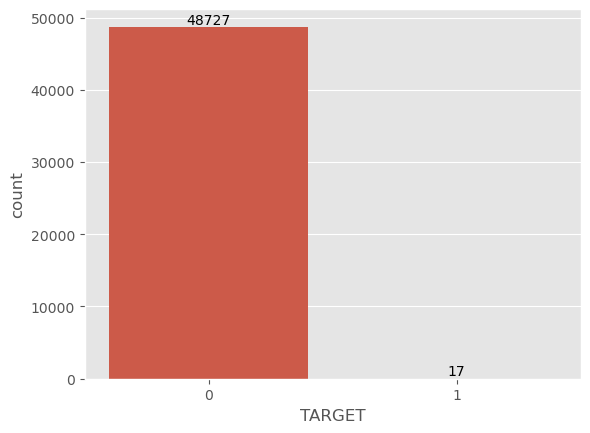

In [77]:
ax = sns.countplot(data=test,x='TARGET')
ax.bar_label(ax.containers[0])
plt.savefig('hasil prediksi')

In [75]:
test['TARGET'].value_counts()

0    48727
1       17
Name: TARGET, dtype: int64